<a href="https://colab.research.google.com/github/monu322/CustomerClassification/blob/main/CE802_P2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#load csv data
df = pd.read_csv('https://raw.githubusercontent.com/monu322/CustomerClassification/main/CE802_P2_Data.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,-7.49,True
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,NaN,True
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,-5.74,False
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,NaN,True
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,NaN,False


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


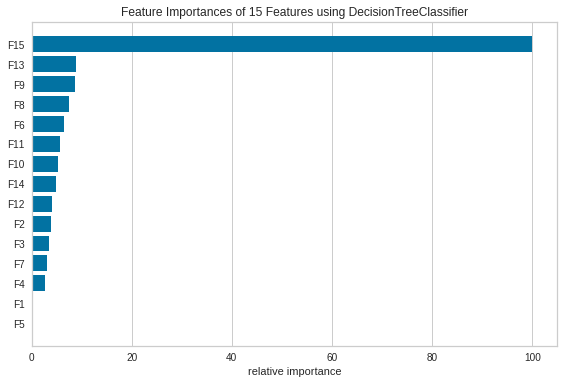

In [32]:
#finding feature importance of F15 after dropping missing value records
from yellowbrick.features import FeatureImportances

df0 = df.dropna()
X = df0.drop(['Class'], axis=1)
y = df0.Class

clf = DecisionTreeClassifier()
viz = FeatureImportances(clf)
viz.fit(X, y)
viz.poof()

In [33]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=10, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()




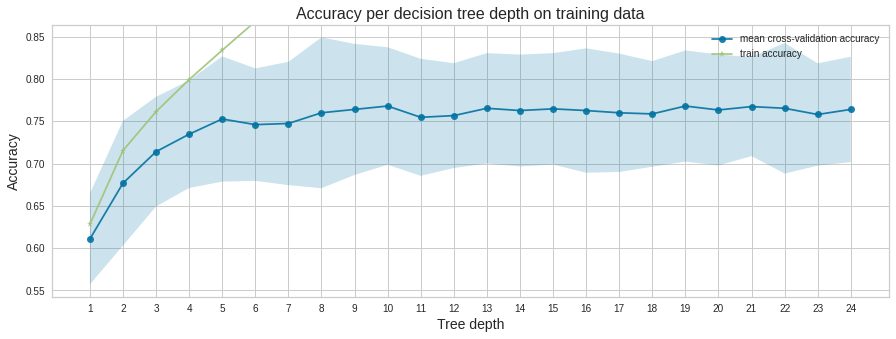

In [34]:
#remove F15 column altogether
df1 = df.drop('F15', 1)

X = df1.drop(['Class'], axis=1)
y = df1.Class

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X, y, sm_tree_depths, cv=10)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

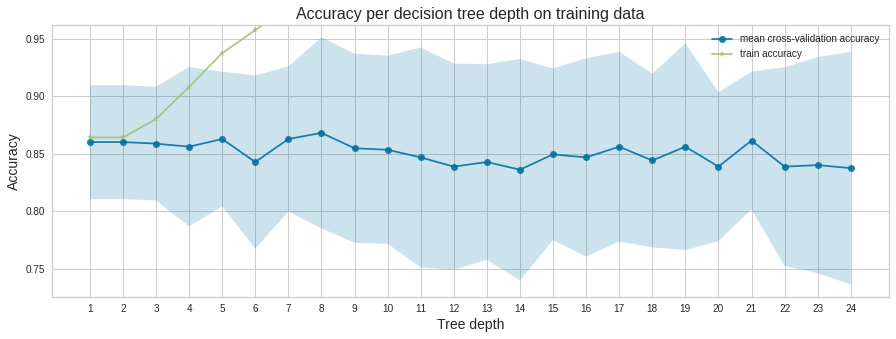

In [35]:
#now let's remove all records with missing values
df2 = df.dropna()

X = df2.drop(['Class'], axis=1)
y = df2.Class

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X, y, sm_tree_depths, cv=10)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [36]:
#now let's try imputation of F15 with mean values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

df3 = df

df3.F15 = imputer.fit_transform(df3['F15'].values.reshape(-1,1))[:,0]

df3.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,-7.490000,True
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,-7.043013,True
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,-5.740000,False
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,-7.043013,True
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,-7.043013,False


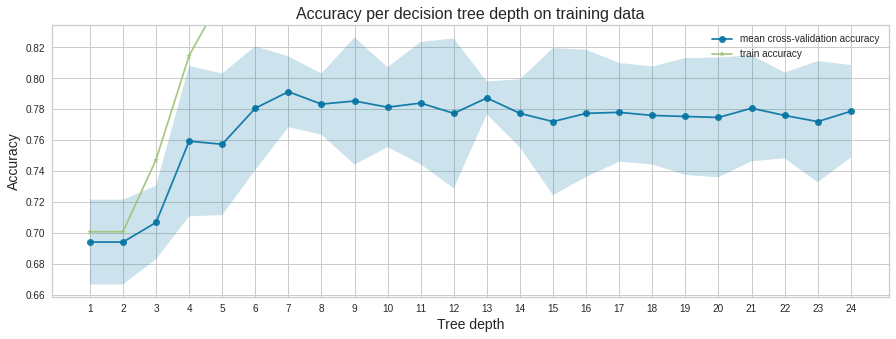

In [37]:
#checking performance of imputed dataset
X = df3.drop(['Class'], axis=1)
y = df3.Class

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X, y, sm_tree_depths, cv=5)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



#Removing records with missing values
df2 = df.dropna()

X = df2.drop(['Class'], axis=1)
y = df2.Class

X = np.array(X)
y = np.array(y)

#using 5-fold cross validation
kf = KFold(5, shuffle=True, random_state=42)
cv_lr_accuracy, cv_svm_accuracy, cv_dt_accuracy, cv_rf_accuracy, cv_nb_accuracy  = [], [], [], [], []

#Evaluating SVM, Logistic Regression, Decision Tree, Random Forest and Naive Bayes classifiers
for train_ind, val_ind in kf.split(X, y):
    # Assign CV IDX
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    # Scale Data
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)

    # Logisitic Regression
    lr = LogisticRegression(
        class_weight= 'balanced',
        solver='newton-cg',
        fit_intercept=True
    ).fit(X_train_scale, y_train)

    y_pred = lr.predict(X_val_scale)
    cv_lr_accuracy.append(accuracy_score(y_val, y_pred))


    #SVM Classification
    svm_clf = svm.SVC(kernel='linear').fit(X_train_scale, y_train)
    y_pred = svm_clf.predict(X_val_scale)
    cv_svm_accuracy.append(accuracy_score(y_val, y_pred))

    #Decision Tree classification
    dt_clf = DecisionTreeClassifier(max_depth=5).fit(X_train_scale, y_train)
    y_pred = dt_clf.predict(X_val_scale)
    cv_dt_accuracy.append(accuracy_score(y_val, y_pred))

    #Random Forest classifier
    rf_clf=RandomForestClassifier(n_estimators=200).fit(X_train_scale, y_train)
    y_pred = rf_clf.predict(X_val_scale)
    cv_rf_accuracy.append(accuracy_score(y_val, y_pred))

    #Naive Bayes classification
    nb_clf = GaussianNB().fit(X_train_scale, y_train)
    y_pred = nb_clf.predict(X_val_scale)
    cv_nb_accuracy.append(accuracy_score(y_val, y_pred))
    
    

print(f'Logistic Regression CV accuracy: {np.mean(cv_lr_accuracy):.3f} +- {np.std(cv_lr_accuracy):.3f}')
print(f'SVM CV accuracy: {np.mean(cv_svm_accuracy):.3f} +- {np.std(cv_svm_accuracy):.3f}')
print(f'Decision Tree CV accuracy: {np.mean(cv_dt_accuracy):.3f} +- {np.std(cv_dt_accuracy):.3f}')
print(f'Random Forest CV accuracy: {np.mean(cv_rf_accuracy):.3f} +- {np.std(cv_rf_accuracy):.3f}')
print(f'Naive Bayes CV accuracy: {np.mean(cv_nb_accuracy):.3f} +- {np.std(cv_nb_accuracy):.3f}')





Logistic Regression CV accuracy: 0.841 +- 0.005
SVM CV accuracy: 0.851 +- 0.014
Decision Tree CV accuracy: 0.757 +- 0.022
Random Forest CV accuracy: 0.873 +- 0.011
Naive Bayes CV accuracy: 0.621 +- 0.029


In [42]:
#as per results, Random forest has the best performance. So let's update our test data csv

#load test data
df = pd.read_csv('https://raw.githubusercontent.com/monu322/CustomerClassification/main/CE802_P2_Test.csv')
df.head()

#impute F15 missing values with mean
df.F15 = imputer.fit_transform(df['F15'].values.reshape(-1,1))[:,0]
df.head()

#divide data into features and labels
X = df.drop(['Class'], axis=1)
y = df.Class

#convert data frame into np array
X = np.array(X)
y = np.array(y)

# Standardize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#use the trained Random Forest model to predict test data labels
y_pred = rf_clf.predict(X_scaled)

df['Class'] = y_pred

#save the data frame into a csv
df.to_csv('CE802_P2_Test.csv')

df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-4,765,-3.72,26.40,30,5.15,18.66,31.06,-4.80,15.18,-5.05,-6.56,-766.22,-1.98,-4.670000,False
1,-3,3,-7.10,1.20,3,0.36,-119.34,20.00,6.39,19.92,-5.29,0.32,-524.22,2.12,-7.076347,False
2,-4,735,-1.70,14.50,30,6.50,183.66,37.36,-11.88,11.22,-7.79,-9.64,-776.22,-3.88,-6.570000,False
3,-14,90,-2.55,13.30,30,7.95,-236.34,32.06,-3.09,15.86,-4.33,-8.76,-916.22,-3.41,-7.076347,False
4,-1,174,-7.63,3.74,3,0.94,-143.34,19.58,11.67,19.62,-7.63,1.12,-506.22,3.08,-7.076347,False
